#### import the things

In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

In [2]:
data_fol = r"..\data_files"

In [3]:
df = pd.read_pickle(os.path.join(data_fol, "dataset.pkl"))

In [4]:
df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types
tid,uid,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18261 entries, (1333476068192366593, 2152363202) to (1343490641230233601, 2394619242)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           18261 non-null  Int64  
 1   reply_count           18261 non-null  Int64  
 2   retweet_count         18261 non-null  Int64  
 3   favorite_count        18261 non-null  Int64  
 4   user_followers_count  18261 non-null  Int64  
 5   user_verified         18261 non-null  boolean
 6   text                  18261 non-null  object 
 7   media_count           18261 non-null  Int64  
 8   media_types           18261 non-null  string 
dtypes: Int64(6), boolean(1), object(1), string(1)
memory usage: 2.8+ MB


dealing with outliers

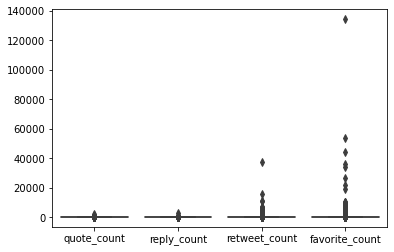

In [6]:
fig, ax = plt.subplots()

sns.boxplot(data=df[['quote_count', 'reply_count', 'retweet_count', 'favorite_count']])
plt.show()

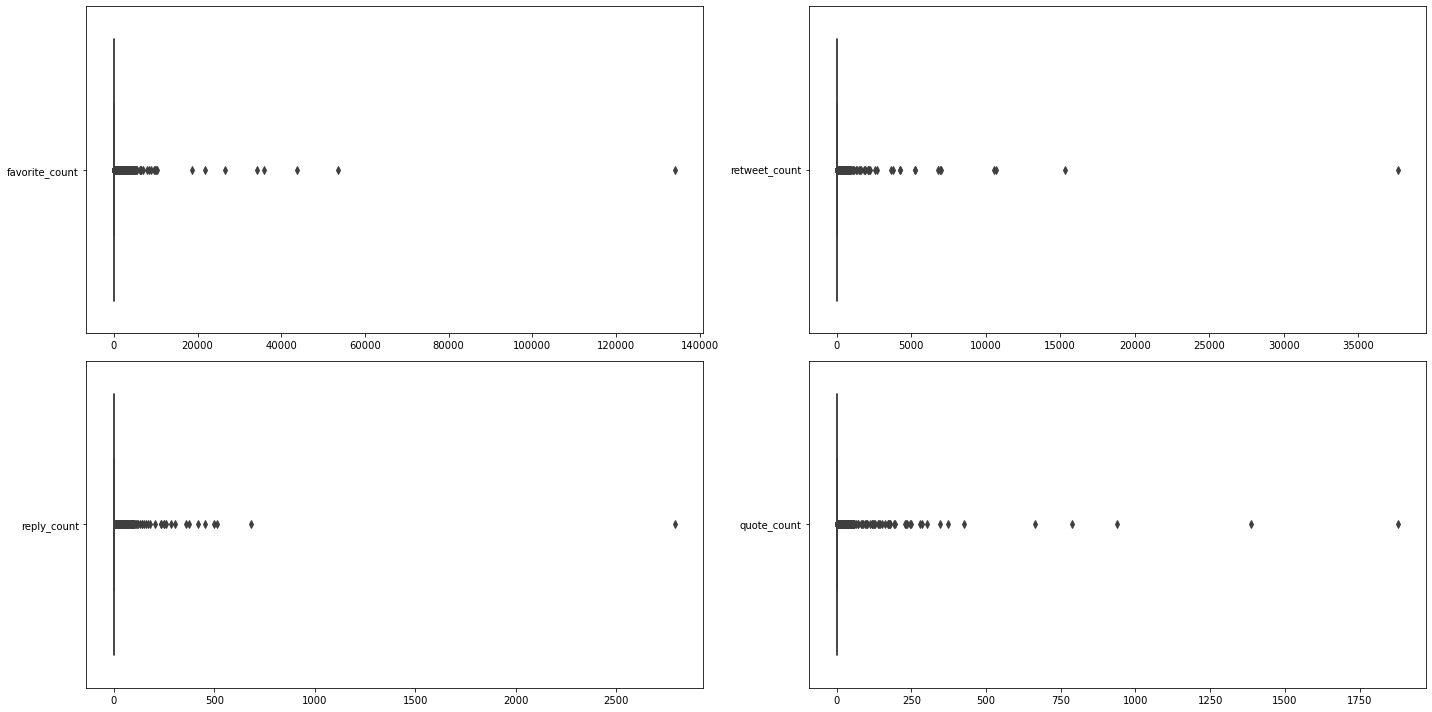

In [7]:
fig, axs = plt.subplots(2,2, figsize=(20,10))

sns.boxplot(data=df[['favorite_count']], orient='h', ax=axs[0,0])
axs[0,0].set_title='favorite_count'

sns.boxplot(data=df[['retweet_count']], orient='h', ax=axs[0,1])
axs[0,1].set_title='retweet_count'

sns.boxplot(data=df[['reply_count']], orient='h', ax=axs[1,0])
axs[1,0].set_title='reply_count'

sns.boxplot(data=df[['quote_count']], orient='h', ax=axs[1,1])
axs[1,1].set_title='quote_count'

plt.tight_layout()
plt.show()

In [8]:
for col in ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']:
    quants = np.quantile(df[col], [.01, .5, .99])
    count_above_99 = sum(df[col] > np.round(quants[2]))
    print(col, quants, count_above_99)

quote_count [0.0 0.0 10.0] 178
reply_count [0.0 0.0 19.0] 180
retweet_count [0.0 0.0 116.80000000000291] 183
favorite_count [0.0 1.0 517.8000000000029] 183


In [9]:
quote_inds = df[df['quote_count'] >= 10].index
reply_inds = df[df['reply_count'] >= 19].index
retweet_inds = df[df['retweet_count'] >= 117].index
favorite_inds = df[df['favorite_count'] >= 518].index

In [10]:
len(quote_inds), len(reply_inds), len(retweet_inds), len(favorite_inds)

(193, 186, 183, 183)

In [11]:
all_inds = set(list(quote_inds) + list(reply_inds) + list(retweet_inds) + list(favorite_inds))

In [12]:
len(all_inds)

337

In [13]:
outliers_df = df.loc[all_inds]

In [14]:
df.drop(index=all_inds, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17924 entries, (1333476068192366593, 2152363202) to (1343490641230233601, 2394619242)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           17924 non-null  Int64  
 1   reply_count           17924 non-null  Int64  
 2   retweet_count         17924 non-null  Int64  
 3   favorite_count        17924 non-null  Int64  
 4   user_followers_count  17924 non-null  Int64  
 5   user_verified         17924 non-null  boolean
 6   text                  17924 non-null  object 
 7   media_count           17924 non-null  Int64  
 8   media_types           17924 non-null  string 
dtypes: Int64(6), boolean(1), object(1), string(1)
memory usage: 2.8+ MB


In [16]:
df.describe()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,media_count
count,17924.000000,17924.000000,17924.000000,17924.000000,1.792400e+04,17924.000000
mean,0.188295,0.593227,2.184111,8.549710,1.683921e+04,0.031522
std,0.755995,1.452616,7.726965,32.130848,2.054266e+05,0.204724
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.390000e+02,0.000000
50%,0.000000,0.000000,0.000000,1.000000,7.160000e+02,0.000000
75%,0.000000,1.000000,1.000000,4.000000,2.934250e+03,0.000000
max,9.000000,18.000000,115.000000,515.000000,1.804246e+07,4.000000


In [17]:
numeric_df = df.select_dtypes(include='Int64')
numeric_df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,media_count
tid,uid,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,0
1364161232270487553,1331332400836726785,0,0,0,0,62,0
1364161201291153414,150301804,0,0,0,0,1044,0
1364161184505737217,1317091162159747075,0,0,0,0,15,0
1363439109948149760,1353391442408792066,0,0,2,24,184,0


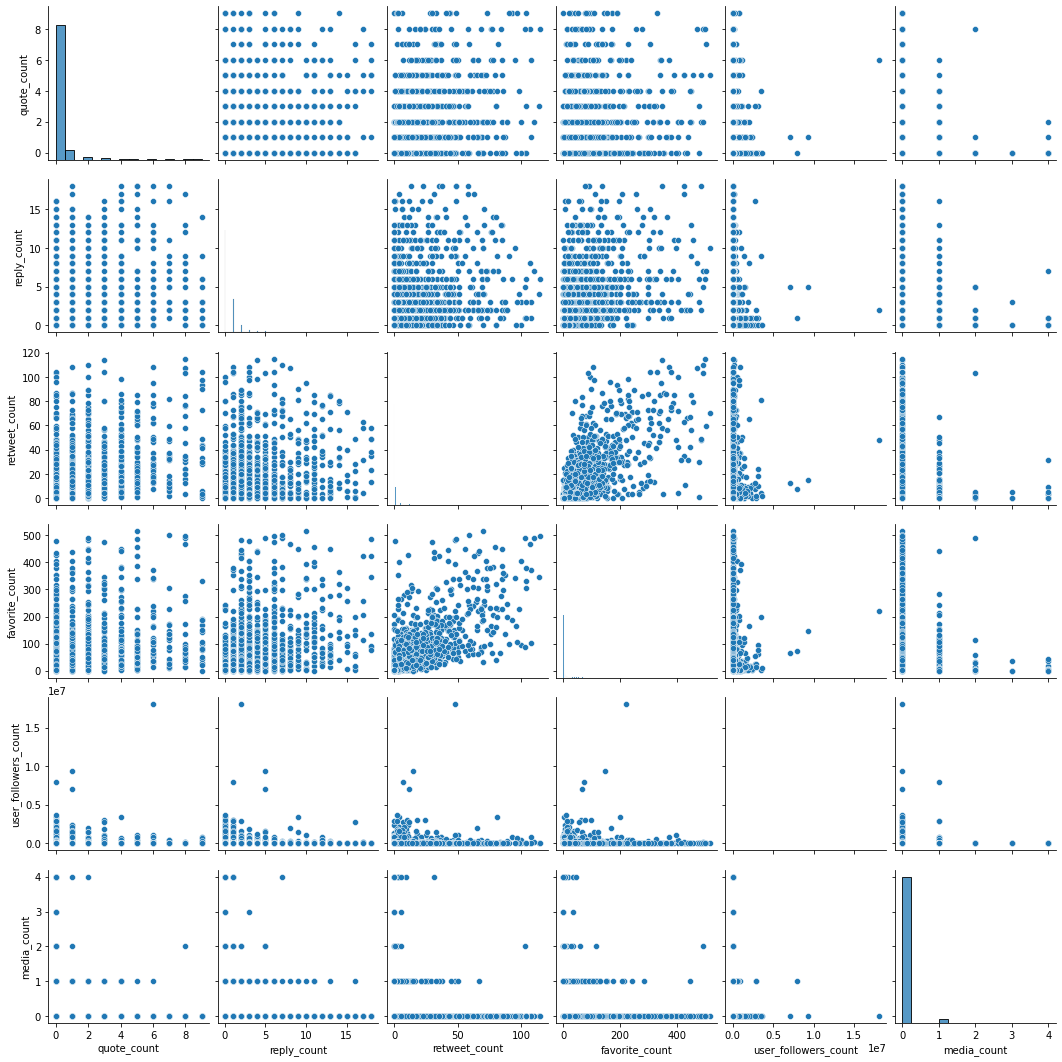

In [20]:
sns.pairplot(numeric_df)
plt.show()

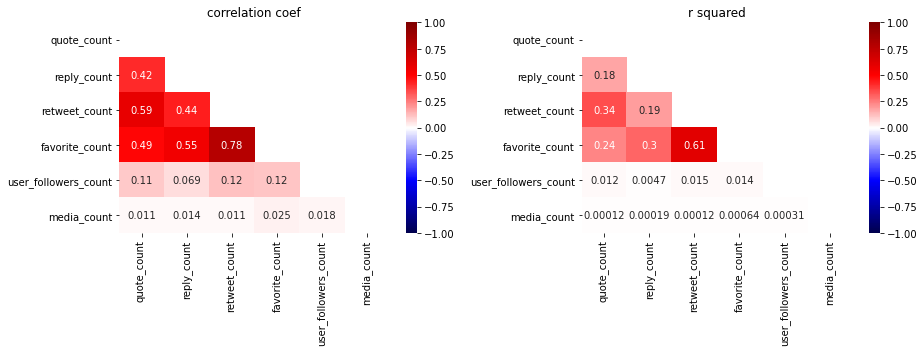

In [38]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[0])
axs[0].set_title('correlation coef')

sns.heatmap(corr**2,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[1])
axs[1].set_title('r squared')


plt.tight_layout()
plt.show()

In [22]:
log_ndf = numeric_df.apply(lambda x: np.log(x+1))

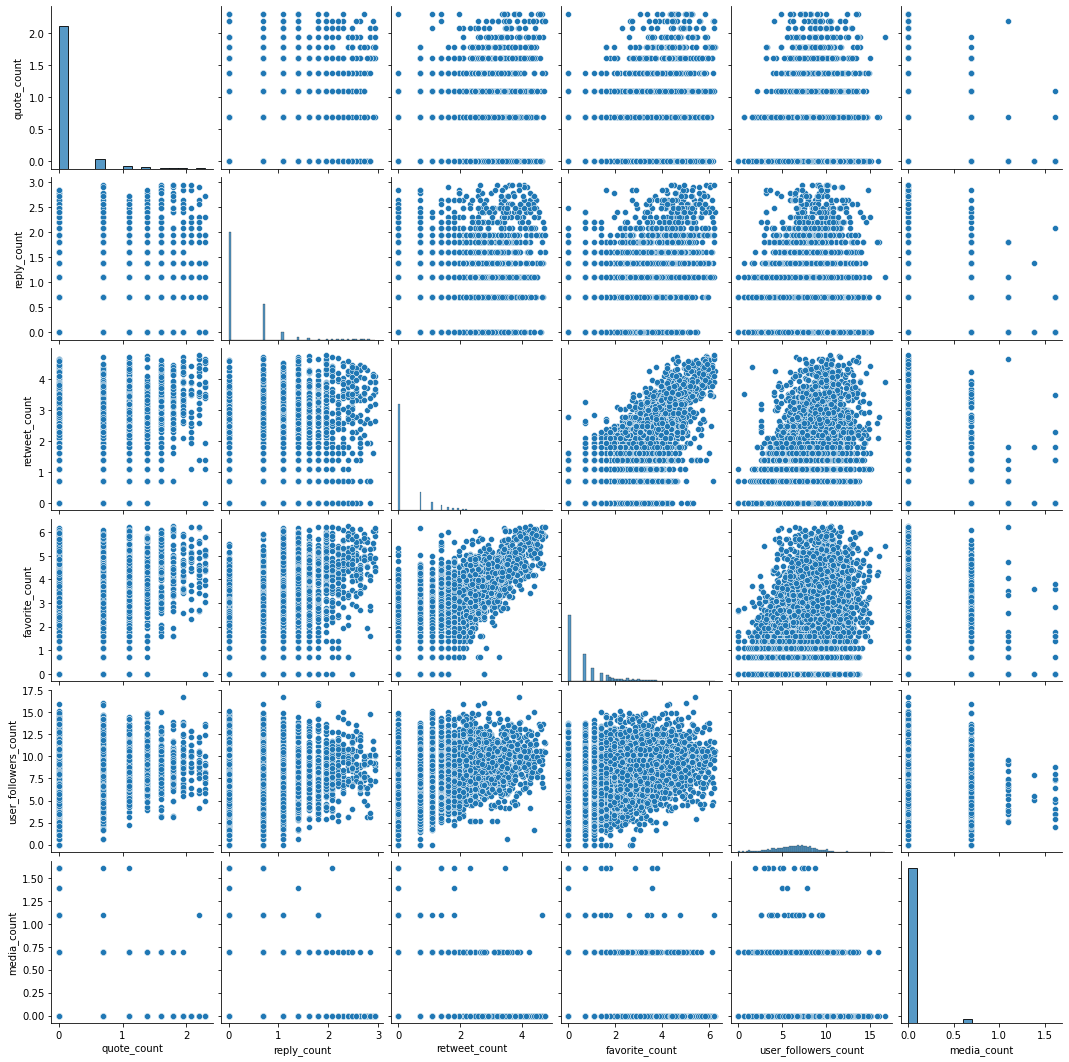

In [23]:
sns.pairplot(log_ndf)
plt.show()

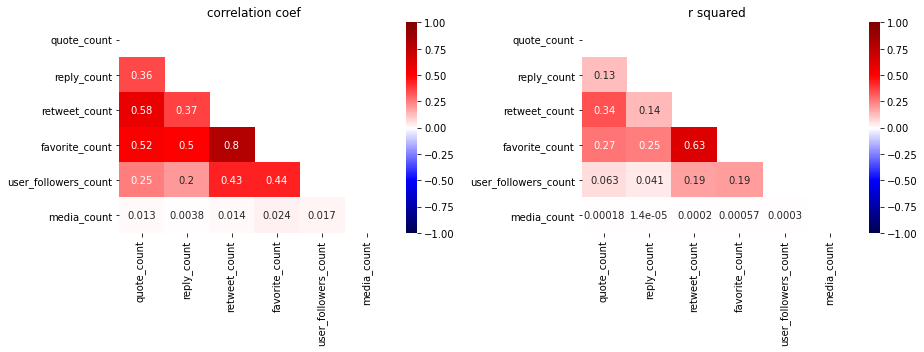

In [37]:
corr = log_ndf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axs = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[0])
axs[0].set_title('correlation coef')

sns.heatmap(corr**2,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[1])
axs[1].set_title('r squared')


plt.tight_layout()
plt.show()

from domain knowledge of Twitter, it's not surprising to see that retweets and favorites are highly correlated, and that all the interactions are medium-strong correlated with one another. This is in line with observed behavior on Twitter. 

I need to combine the interaction metrics, but quote tweets and replies are fundamentally different in nature from retweets and favorites. QRTs/replies can be positive or negative, whereas favorites and retweets are at worst value neutral, at best, positive. A favorite/retweet is a "clean" interaction in that it doesn't carry the weight of interpertating another person's commentary. If the goal is to reach larger and larger audiences, it might not always be beneficial to try to get increased dialogue. However, maybe sometimes the goal actually is community dialogue, in which case it might be valuable to know how to optimize for written responses instead of passive engagement. 

While there are slight differences in the connotations of quote tweets versus responses, and retweets versus likes, for the most part I believe these can be put into to broad categories: active and passive engagement. 

In [18]:
df['active_engagement'] = df['quote_count'] + df['reply_count']
df['passive_engagement'] = df['favorite_count'] + df['retweet_count']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17924 entries, (1333476068192366593, 2152363202) to (1343490641230233601, 2394619242)
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           17924 non-null  Int64  
 1   reply_count           17924 non-null  Int64  
 2   retweet_count         17924 non-null  Int64  
 3   favorite_count        17924 non-null  Int64  
 4   user_followers_count  17924 non-null  Int64  
 5   user_verified         17924 non-null  boolean
 6   text                  17924 non-null  object 
 7   media_count           17924 non-null  Int64  
 8   media_types           17924 non-null  string 
 9   active_engagement     17924 non-null  Int64  
 10  passive_engagement    17924 non-null  Int64  
dtypes: Int64(8), boolean(1), object(1), string(1)
memory usage: 3.1+ MB


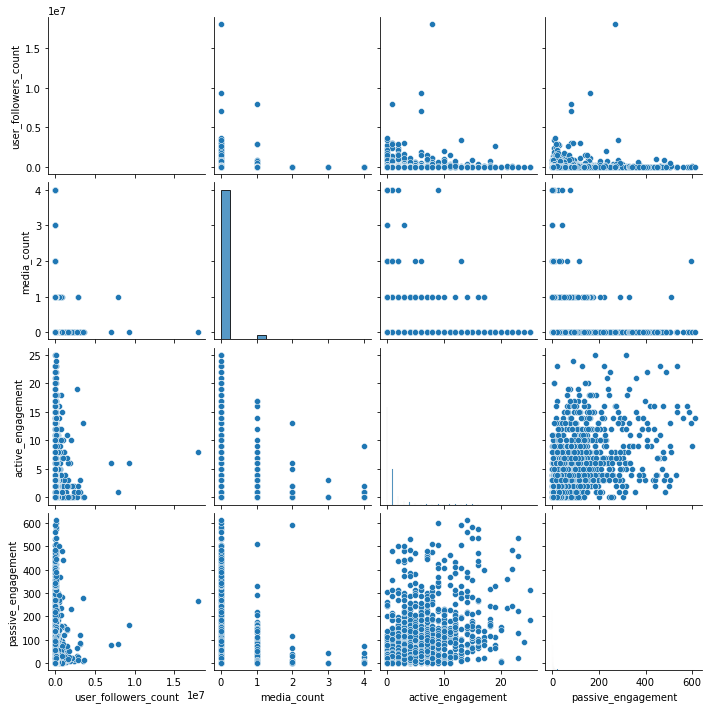

In [20]:
sns.pairplot(df[['user_followers_count', 'media_count', 'active_engagement', 'passive_engagement']])
plt.show()

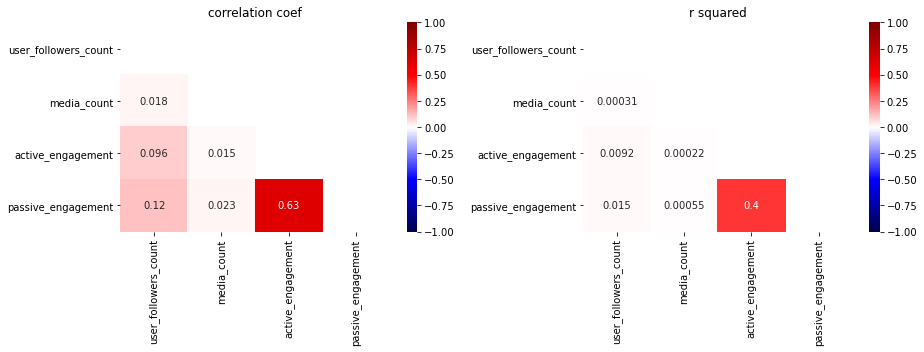

In [22]:
corr = df[['user_followers_count', 'media_count', 'active_engagement', 'passive_engagement']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[0])
axs[0].set_title('correlation coef')

sns.heatmap(corr**2,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[1])
axs[1].set_title('r squared')


plt.tight_layout()
plt.show()

In [23]:
log_engdf = df[['user_followers_count', 'media_count', 'active_engagement', 'passive_engagement']].apply(lambda x: np.log(x+1))

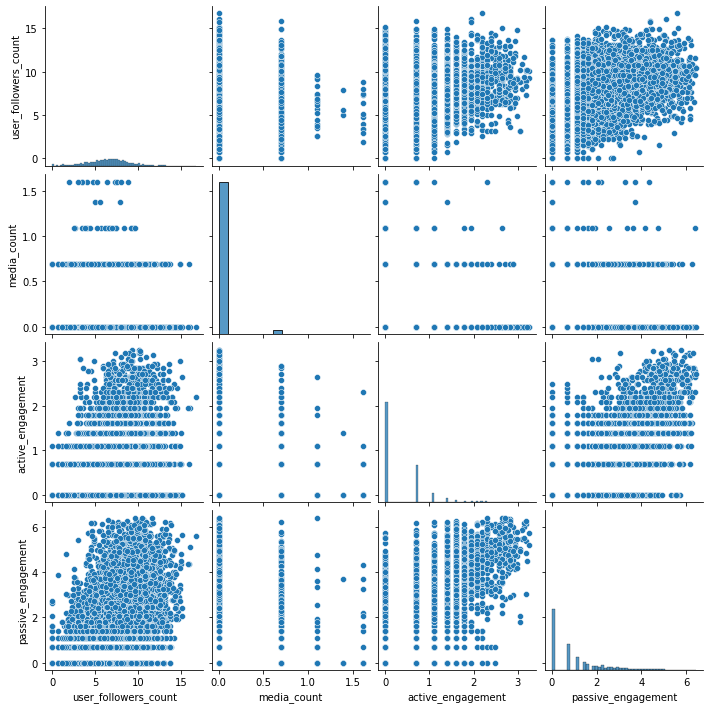

In [24]:
sns.pairplot(log_engdf)
plt.show()

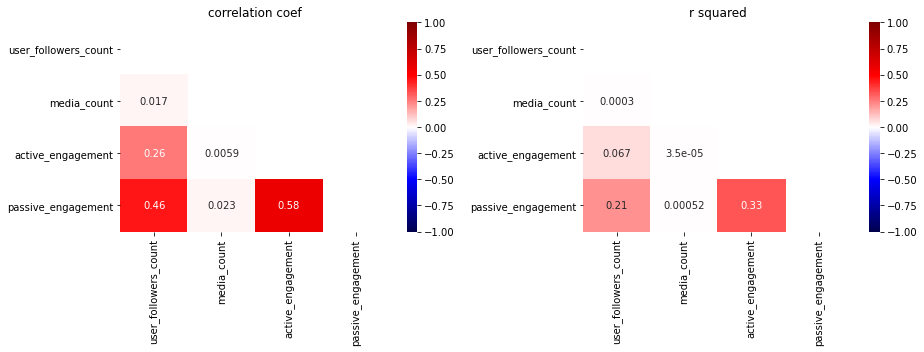

In [25]:
corr = log_engdf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[0])
axs[0].set_title('correlation coef')

sns.heatmap(corr**2,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask,
           annot=True,
           ax = axs[1])
axs[1].set_title('r squared')


plt.tight_layout()
plt.show()

In [27]:
df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types,active_engagement,passive_engagement
tid,uid,,,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none,2,19
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none,0,0
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none,0,0
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none,0,0
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none,0,26


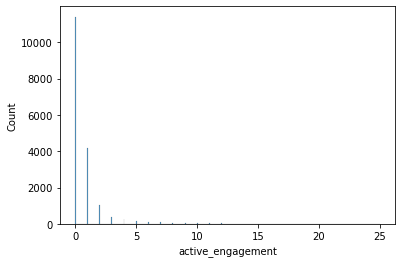

In [29]:
sns.histplot(df['active_engagement'])
plt.show()

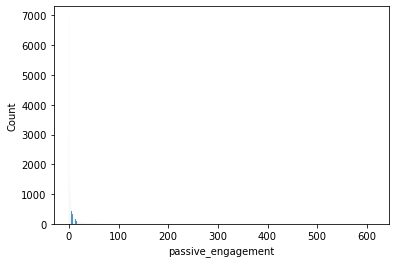

In [30]:
sns.histplot(df['passive_engagement'])
plt.show()

#### try min max scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
mms = MinMaxScaler()

In [32]:
xform_passive = mms.fit_transform(df[['passive_engagement']])

In [33]:
xform_active = mms.fit_transform(df[['active_engagement']])

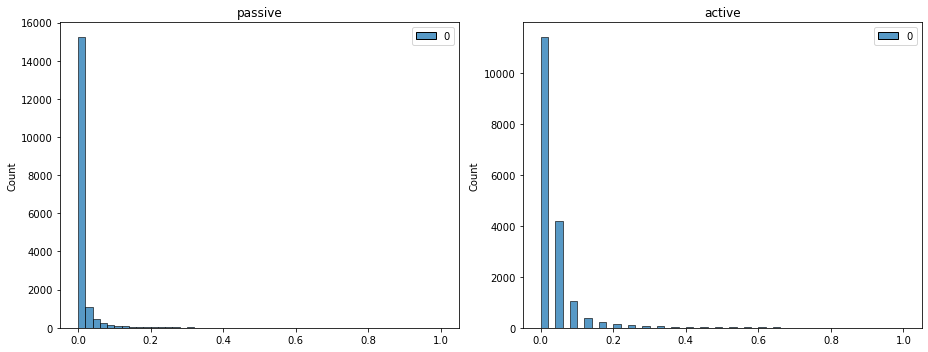

In [36]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
bins = 50
sns.histplot(xform_passive, bins=bins, ax=axs[0])
axs[0].set_title('passive')

sns.histplot(xform_active, bins=bins, ax=axs[1])
axs[1].set_title('active')


plt.tight_layout()
plt.show()

#### try log scaling

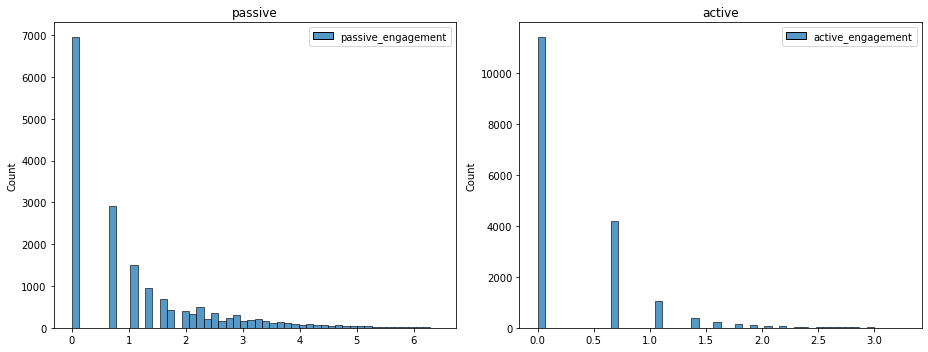

In [39]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
bins = 50
sns.histplot(df[['passive_engagement']].apply(lambda x: np.log(x+1)), bins=bins, ax=axs[0])
axs[0].set_title('passive')

sns.histplot(df[['active_engagement']].apply(lambda x: np.log(x+1)), bins=bins, ax=axs[1])
axs[1].set_title('active')


plt.tight_layout()
plt.show()

In [46]:
for col in ['active_engagement', 'passive_engagement']:
    quants = np.quantile(df[col], [.88, .9, .92])
    count_above = sum(df[col] > np.round(quants[-1]))
    print(col, quants, count_above)

active_engagement [2.0 2.0 2.0] 1271
passive_engagement [17.0 21.0 27.0] 1421


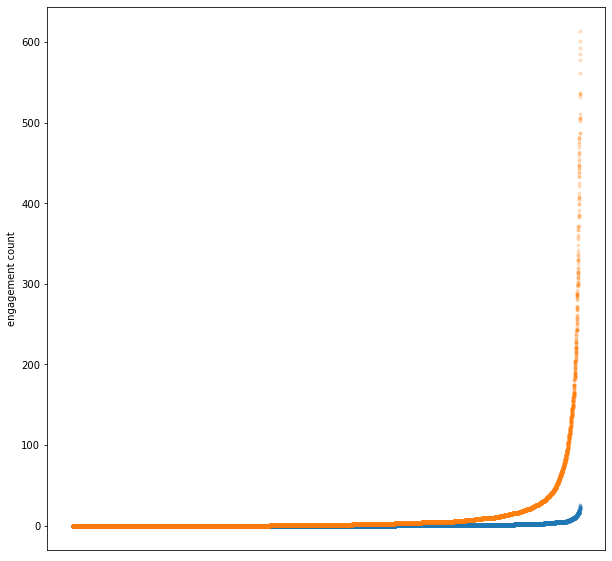

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=range(len(df)), y=df['active_engagement'].sort_values().values, marker='.', alpha=.2)
plt.scatter(x=range(len(df)), y=df['passive_engagement'].sort_values().values, marker='.', alpha=.2)
plt.ylabel('engagement count')
plt.xticks([])
plt.show()

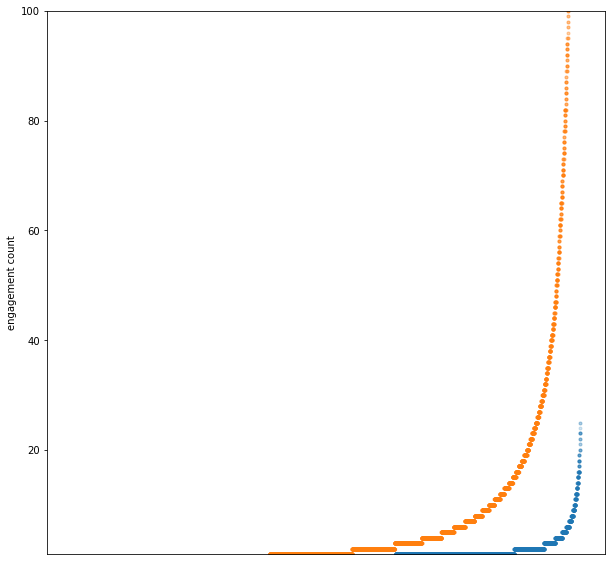

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=range(len(df)), y=df['active_engagement'].sort_values().values, marker='.', alpha=.2)
plt.scatter(x=range(len(df)), y=df['passive_engagement'].sort_values().values, marker='.', alpha=.2)
plt.ylabel('engagement count')
plt.xticks([])
plt.ylim([1,100])
plt.show()

In [62]:
df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types,active_engagement,passive_engagement
tid,uid,,,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none,2,19
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none,0,0
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none,0,0
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none,0,0
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none,0,26


In [63]:
pd.to_pickle(df, os.path.join(data_fol, "dataset_no_outliers_engagement.pkl"))